## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [1]:
import tensorflow as tf
print (tf.__version__)

2.3.0


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [4]:
print ('Training Features: ',x_train.shape)
print ('Training Labels: ',y_train.shape)

Training Features:  (60000, 28, 28)
Training Labels:  (60000,)


In [5]:
print ('Testing Features: ',x_test.shape)
print ('Testing Labels: ',y_test.shape)

Testing Features:  (10000, 28, 28)
Testing Labels:  (10000,)


### Find dimensions of an image in the dataset

(28, 28)


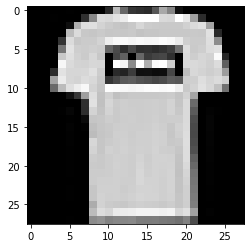

In [6]:
plt.imshow(x_train[1,:,:],cmap='gray')
print(x_train.shape[1:3])

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [7]:
y_train.max()

9

In [8]:
print (pd.value_counts(y_train))

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64


In [9]:
ytrain = tf.keras.utils.to_categorical(y_train,num_classes=10)

In [10]:
ytest = tf.keras.utils.to_categorical(y_test,num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [11]:
x_train = x_train.astype('float32')
x_train/=255.0

In [12]:
x_test = x_test.astype('float32')
x_test/=255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [13]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

### Import the necessary layers from keras to build the model

In [14]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [15]:
initializer = tf.keras.initializers.he_uniform()

In [16]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001, patience=5, verbose=1)

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu',kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,222,250
Trainable params: 3,222,250
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(x_train,ytrain,batch_size=3000,epochs=10,validation_data=(x_test,ytest),callbacks=[es])

Epoch 1/10
20/20 [==============================] - 1s 66ms/step - loss: 0.9522 - accuracy: 0.6735 - val_loss: 0.5753 - val_accuracy: 0.7997
Epoch 2/10
20/20 [==============================] - 1s 55ms/step - loss: 0.4986 - accuracy: 0.8255 - val_loss: 0.4671 - val_accuracy: 0.8312
Epoch 3/10
20/20 [==============================] - 1s 54ms/step - loss: 0.4029 - accuracy: 0.8586 - val_loss: 0.4013 - val_accuracy: 0.8603
Epoch 4/10
20/20 [==============================] - 1s 54ms/step - loss: 0.3525 - accuracy: 0.8755 - val_loss: 0.3618 - val_accuracy: 0.8693
Epoch 5/10
20/20 [==============================] - 1s 54ms/step - loss: 0.3178 - accuracy: 0.8875 - val_loss: 0.3456 - val_accuracy: 0.8764
Epoch 6/10
20/20 [==============================] - 1s 54ms/step - loss: 0.2913 - accuracy: 0.8959 - val_loss: 0.3248 - val_accuracy: 0.8841
Epoch 7/10
20/20 [==============================] - 1s 54ms/step - loss: 0.2756 - accuracy: 0.9021 - val_loss: 0.3105 - val_accuracy: 0.8894
Epoch 8/10
20

In [20]:
# Evaluate the model on test set
loss, accuracy = model.evaluate(x_test, ytest, verbose=0)
# Print test accuracy
print('Test accuracy:', accuracy)

Test accuracy: 0.8930000066757202


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=1,padding='valid'))
model.add(tf.keras.layers.Dropout(0.25,seed=42))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu',kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23328)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2986112   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(x_train,ytrain,batch_size=3000,epochs=10,validation_data=(x_test,ytest),callbacks=[es])

Epoch 1/10
20/20 [==============================] - 2s 75ms/step - loss: 0.8901 - accuracy: 0.6925 - val_loss: 0.5391 - val_accuracy: 0.8095
Epoch 2/10
20/20 [==============================] - 1s 67ms/step - loss: 0.4511 - accuracy: 0.8413 - val_loss: 0.4271 - val_accuracy: 0.8451
Epoch 3/10
20/20 [==============================] - 1s 67ms/step - loss: 0.3716 - accuracy: 0.8695 - val_loss: 0.3687 - val_accuracy: 0.8715
Epoch 4/10
20/20 [==============================] - 1s 67ms/step - loss: 0.3283 - accuracy: 0.8853 - val_loss: 0.3402 - val_accuracy: 0.8788
Epoch 5/10
20/20 [==============================] - 1s 67ms/step - loss: 0.3022 - accuracy: 0.8934 - val_loss: 0.3332 - val_accuracy: 0.8835
Epoch 6/10
20/20 [==============================] - 1s 66ms/step - loss: 0.2831 - accuracy: 0.8990 - val_loss: 0.3080 - val_accuracy: 0.8906
Epoch 7/10
20/20 [==============================] - 1s 66ms/step - loss: 0.2646 - accuracy: 0.9069 - val_loss: 0.2966 - val_accuracy: 0.8910
Epoch 8/10
20

In [24]:
# Evaluate the model on test set
loss, accuracy = model.evaluate(x_test, ytest, verbose=0)
# Print test accuracy
print('Test accuracy:', accuracy)

Test accuracy: 0.9053999781608582


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=30,
                             shear_range=0.2,
                             zoom_range=0.3)
datagen.fit(x_train)

In [27]:
train_gen = datagen.flow(x_train,ytrain,batch_size=3000)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

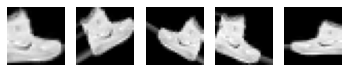

In [28]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=1,padding='valid'))
model.add(tf.keras.layers.Dropout(0.25,seed=42))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu',kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 27, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 23328)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2986112   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
history = model.fit_generator(train_gen, validation_data = (x_test, ytest), 
                              steps_per_epoch = len(x_train) // 3000, epochs = 10, callbacks=[es])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 19s 951ms/step - loss: 1.6704 - accuracy: 0.4004 - val_loss: 0.9800 - val_accuracy: 0.6400
Epoch 2/10
20/20 [==============================] - 19s 954ms/step - loss: 1.1698 - accuracy: 0.5806 - val_loss: 0.8046 - val_accuracy: 0.6913
Epoch 3/10
20/20 [==============================] - 19s 942ms/step - loss: 1.0122 - accuracy: 0.6339 - val_loss: 0.7520 - val_accuracy: 0.7230
Epoch 4/10
20/20 [==============================] - 19s 948ms/step - loss: 0.9233 - accuracy: 0.6656 - val_loss: 0.7456 - val_accuracy: 0.7283
Epoch 5/10
20/20 [==============================] - 19s 934ms/step - loss: 0.8628 - accuracy: 0.6849 - val_loss: 0.6964 - val_accuracy: 0.7333
Epoch 6/10
20/20 [==============================] - 19s 928ms/step - loss: 0.8299 - accuracy: 0.6954 - val_loss: 0.6433 - val_accuracy: 0.7603
Epoch 7/10
20/20 [==============================] - 19s 930ms/step

In [32]:
# Evaluate the model on test set
loss, accuracy = model.evaluate(x_test, ytest, verbose=0)
# Print test accuracy
print('Test accuracy:', accuracy)

Test accuracy: 0.7675999999046326


###  Report the final train and validation accuracy

In [33]:
loss, accuracy = model.evaluate(x_train,ytrain, verbose=0)
print ('Training Accuracy:', accuracy)

Training Accuracy: 0.7742166519165039


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [35]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [36]:
print ('Training Feature Shape: ',x_train.shape)
print ('Testing Feature Shape: ',x_test.shape)

Training Feature Shape:  (50000, 32, 32, 3)
Testing Feature Shape:  (10000, 32, 32, 3)


In [37]:
print ('Training Label Shape: ',y_train.shape)
print ('Testing Label Shape: ',y_test.shape)

Training Label Shape:  (50000, 1)
Testing Label Shape:  (10000, 1)


(32, 32, 3)


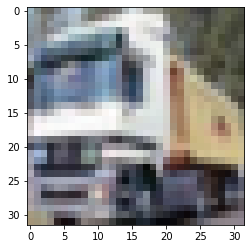

In [38]:
plt.imshow(x_train[1,:,:,:])
print(x_train.shape[1:4])

In [39]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],3)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [40]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=30,
                             shear_range=0.2,
                             data_format='channels_last')

### **Prepare/fit the generator.**

In [41]:
datagen.fit(x_train)

In [42]:
x_train = x_train.astype('float32')
x_test = x_train.astype('float32')

In [43]:
x_train/=255.0
x_test/=255.0

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

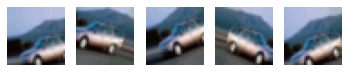

In [44]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[4:5], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

**Creating a ConvNet model for predicting CIFAR10 images**

In [45]:
ytrain = tf.keras.utils.to_categorical(y_train,num_classes=10)
ytest = tf.keras.utils.to_categorical(y_train,num_classes=10)

In [46]:
train_gen = datagen.flow(x_train,ytrain,batch_size=1000)

In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=1,padding='valid'))
model.add(tf.keras.layers.Dropout(0.25,seed=42))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=1,padding='valid'))
model.add(tf.keras.layers.Dropout(0.25,seed=42))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer=initializer))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(250,activation='relu',kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 31, 31, 64)       

In [48]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.fit(train_gen, 
          validation_data = (x_test, ytest), 
          steps_per_epoch = len(x_train)//1000,
          epochs = 10)

Epoch 1/10
50/50 [==============================] - 36s 718ms/step - loss: 1.8330 - accuracy: 0.3339 - val_loss: 1.8964 - val_accuracy: 0.3347
Epoch 2/10
50/50 [==============================] - 36s 710ms/step - loss: 1.5243 - accuracy: 0.4462 - val_loss: 1.6411 - val_accuracy: 0.4248
Epoch 3/10
50/50 [==============================] - 36s 713ms/step - loss: 1.3869 - accuracy: 0.4978 - val_loss: 1.4738 - val_accuracy: 0.4488
Epoch 4/10
50/50 [==============================] - 36s 712ms/step - loss: 1.2982 - accuracy: 0.5321 - val_loss: 1.3090 - val_accuracy: 0.5174
Epoch 5/10
50/50 [==============================] - 36s 712ms/step - loss: 1.2340 - accuracy: 0.5547 - val_loss: 1.3567 - val_accuracy: 0.5383
Epoch 6/10
50/50 [==============================] - 36s 713ms/step - loss: 1.1751 - accuracy: 0.5751 - val_loss: 1.2755 - val_accuracy: 0.5632
Epoch 7/10
50/50 [==============================] - 36s 721ms/step - loss: 1.1283 - accuracy: 0.5973 - val_loss: 1.3387 - val_accuracy: 0.5673

In [50]:
# Evaluate the model on test set
loss, accuracy = model.evaluate(x_test, ytest, verbose=0)
# Print test accuracy
print('Test accuracy:', accuracy)

Test accuracy: 0.6527600288391113
